# **IMPORTACION LIBRERIAS**

In [63]:
!pip install --upgrade openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
#importar librerias de interes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score  #ytrue, ypred
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import requests
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **IMPORTACION DATASETS**

In [65]:
# Cargar dataset compras
url_compras = "../data/raw/COMPRAS.xlsx"

# Leer archivo Excel como DataFrame usando openpyxl engine
df_compras = pd.read_excel(url_compras, names=['bodega', 'producto_id', 'doc_id', 'fecha', 'producto', 'unidad', 'cantidad_compra', 'costo_unitario', 'total_compra'])
df_compras

,bodega,producto_id,doc_id,fecha,producto,unidad,cantidad_compra,costo_unitario,total_compra
0,6,I.I.E90005,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 900 4.1"" 12DIENTES CLEAN ...",Und,1207.0,11.94,14412.00
1,6,I.I.E90001,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 900 6.1"" EZ CLE 18D CUADRA...",Und,400.0,17.14,6856.00
2,6,I.I.E80003,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 800 6.5"" EZ CLEAN EJE CU...",Und,198.0,17.31,3427.99
3,6,I.I.E24003,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 2400 DE 3.9"" 12DIE AGUJER...",Und,100.0,8.57,857.00
4,6,I.I.P8.0035,EI00005804,25.ENE.2021,"PASADOR S800 ACETAL LONG 156""",UND,500.0,7.65,3825.00
...,...,...,...,...,...,...,...,...,...
1507,6,I.I.1192,EP00010706,25.FEB.2025,BANDA INTRALOX SERIE 900 FLUSH GRID POLIETIELN...,UND,1.0,125.10,125.10
1508,6,I.I.1193,EP00010706,25.FEB.2025,BANDA INTARLOX SERIE 900 FLSUH GRID POLIETILEN...,UND,1.0,537.64,537.64
1509,6,I.I.0677,EP00010707,25.FEB.2025,BANDA INTRALOX S900 PROD. TERM. ISHI,UND,1.0,487.28,487.28
1510,6,I.I.1194,EP00010710,26.FEB.2025,"BANDA S900 FLUSH GRID CON OPEN GRID CADA 4.5"" ...",MTS,18.0,111.23,2002.29


In [66]:
#cargar dataset compras
url_ventas = "../data/raw/VENTAS.xlsx"

#leer archivo excel como df
df_ventas = pd.read_excel(url_ventas, names=['doc_id', 'fecha', 'semana', 'trimestre', 'cliente', 'ciudad', 'producto_id', 'producto', 'cantidad_venta', 'precio_unitario', 'total_venta', 'descuento', 'total'])
df_ventas

,doc_id,fecha,semana,trimestre,cliente,ciudad,producto_id,producto,cantidad_venta,precio_unitario,total_venta,descuento,total
0,FE00017025,2022-07-26,5,3,PROVITAN,GUAYAQUIL,I.I.0777,BANDA SERIE 200 OPEN GRID POLIPROPILENO,1.0,31328.000,31328.00,0.0,31328.00
1,FE00024444,2024-05-28,5,2,PROMARISCO S.A.,GUAYAQUIL,I.I.1052,BANDA SERIE 900 OPEN GRID POLIPRO AZUL 1,689.0,44.671,30778.32,0.0,30778.32
2,FE00016190,2022-05-20,4,2,PROMARISCO S.A.,GUAYAQUIL,I.I.B9.0390,BANDA SERIE 900 FLUSH GRID P.P. AZUL,400.0,75.822,30328.80,0.0,30328.80
3,FE00016987,2022-07-22,4,3,LATAMFOODS S.A.,GUAYAQUIL,I.I.0775,BANDA SERIE 900 INTRALOX FLUSH GRID POLI,24.0,1067.766,25626.38,0.0,25626.38
4,FE00024920,2024-07-09,2,3,PROCESADORA POSORJA PROPOSORJA S.A.,GUAYAQUIL,I.I.B9.0433,BANDA SERIE 900 FLUSH GRID P.P. AZUL,180.0,137.260,24706.80,0.0,24706.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,FE00024662,2024-06-17,4,2,HORTIFRUT-ECUADOR S.A,LOJA,I.I.0172,PASADOR S900 INTRALOX POLIETILENO,5.0,2.000,10.00,1.0,9.00
2089,FE00014704,2021-12-20,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.845,5.54,0.0,5.54
2090,FE00024242,2024-05-09,2,2,FRANKLIN LEONARDO SANCHEZ BENAVIDES,GUAYAQUIL,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.800,5.40,0.0,5.40
2091,FE00014704,2021-12-20,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0046,PASADOR S800 INTRALOX POLIPRO 1/4¨,1.0,1.850,1.85,0.0,1.85


In [67]:
# cargar dataset indicadores
url_indicadores = "../data/raw/indicadores.xlsx"

#leer excel como dataframe de pandas
df_indicadores = pd.read_excel(url_indicadores)
df_indicadores

,año,mes,petroleo_brent,ipc,pib,pib_trimestre
0,2021,1,55.6,104.35,0.042,0.03766
1,2021,2,57.4,104.44,0.042,0.03766
2,2021,3,66.7,104.63,0.042,0.03766
3,2021,4,65.4,104.99,0.042,0.03199
4,2021,5,68.7,105.08,0.042,0.03199
5,2021,6,73.5,104.89,0.042,0.03199
6,2021,7,74.9,105.45,0.042,0.02036
7,2021,8,71.2,105.57,0.042,0.02036
8,2021,9,74.5,105.58,0.042,0.02036
9,2021,10,84.3,105.80,0.042,0.01003


# **PRE-PROCESAMIENTO DE DATOS**

**COMPRAS**

In [68]:
#verificar tipos de dato y datos nulos
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bodega           1512 non-null   int64  
 1   producto_id      1512 non-null   object 
 2   doc_id           1512 non-null   object 
 3   fecha            1512 non-null   object 
 4   producto         1512 non-null   object 
 5   unidad           1512 non-null   object 
 6   cantidad_compra  1512 non-null   float64
 7   costo_unitario   1512 non-null   float64
 8   total_compra     1512 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 106.4+ KB


In [69]:
#convertir unidades a minuscula
df_compras['unidad'] = df_compras['unidad'].str.lower()
df_compras

,bodega,producto_id,doc_id,fecha,producto,unidad,cantidad_compra,costo_unitario,total_compra
0,6,I.I.E90005,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 900 4.1"" 12DIENTES CLEAN ...",und,1207.0,11.94,14412.00
1,6,I.I.E90001,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 900 6.1"" EZ CLE 18D CUADRA...",und,400.0,17.14,6856.00
2,6,I.I.E80003,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 800 6.5"" EZ CLEAN EJE CU...",und,198.0,17.31,3427.99
3,6,I.I.E24003,EI00005804,25.ENE.2021,"ENGRANAJE SERIE 2400 DE 3.9"" 12DIE AGUJER...",und,100.0,8.57,857.00
4,6,I.I.P8.0035,EI00005804,25.ENE.2021,"PASADOR S800 ACETAL LONG 156""",und,500.0,7.65,3825.00
...,...,...,...,...,...,...,...,...,...
1507,6,I.I.1192,EP00010706,25.FEB.2025,BANDA INTRALOX SERIE 900 FLUSH GRID POLIETIELN...,und,1.0,125.10,125.10
1508,6,I.I.1193,EP00010706,25.FEB.2025,BANDA INTARLOX SERIE 900 FLSUH GRID POLIETILEN...,und,1.0,537.64,537.64
1509,6,I.I.0677,EP00010707,25.FEB.2025,BANDA INTRALOX S900 PROD. TERM. ISHI,und,1.0,487.28,487.28
1510,6,I.I.1194,EP00010710,26.FEB.2025,"BANDA S900 FLUSH GRID CON OPEN GRID CADA 4.5"" ...",mts,18.0,111.23,2002.29


In [70]:
#funcion para convertir fechas
def convertir_formato_fecha(columna_fechas):
    """
    Convierte fechas del formato 'DD.MES.AAAA' a 'DD-MM-AAAA'.
    Args:
        columna_fechas (pd.Series): Serie de Pandas con fechas en el formato original.
    Returns:
        pd.Series: Serie de Pandas con fechas en el nuevo formato.
    """
    def convertir_fecha(fecha_str):
        """Convierte una sola fecha."""
        try:
            dia, mes_abr, año = fecha_str.split('.')
            mes_num = {
                'ENE': '01', 'FEB': '02', 'MZO': '03', 'ABR': '04',
                'MAY': '05', 'JUN': '06', 'JUL': '07', 'AGT': '08',
                'SEP': '09', 'OCT': '10', 'NOV': '11', 'DIC': '12'
            }[mes_abr]
            return f'{dia}-{mes_num}-{año}'
        except:
            return None # Manejar fechas no válidas
    return columna_fechas.apply(convertir_fecha)

In [71]:
#convertir fechas a formato dd-mm-yyyy
df_compras['fecha'] = convertir_formato_fecha(df_compras['fecha'])
df_compras['fecha'] = pd.to_datetime(df_compras['fecha'], format='%d-%m-%Y')
df_compras['fecha'] = df_compras['fecha'].dt.strftime('%d-%m-%Y')
df_compras

,bodega,producto_id,doc_id,fecha,producto,unidad,cantidad_compra,costo_unitario,total_compra
0,6,I.I.E90005,EI00005804,25-01-2021,"ENGRANAJE SERIE 900 4.1"" 12DIENTES CLEAN ...",und,1207.0,11.94,14412.00
1,6,I.I.E90001,EI00005804,25-01-2021,"ENGRANAJE SERIE 900 6.1"" EZ CLE 18D CUADRA...",und,400.0,17.14,6856.00
2,6,I.I.E80003,EI00005804,25-01-2021,"ENGRANAJE SERIE 800 6.5"" EZ CLEAN EJE CU...",und,198.0,17.31,3427.99
3,6,I.I.E24003,EI00005804,25-01-2021,"ENGRANAJE SERIE 2400 DE 3.9"" 12DIE AGUJER...",und,100.0,8.57,857.00
4,6,I.I.P8.0035,EI00005804,25-01-2021,"PASADOR S800 ACETAL LONG 156""",und,500.0,7.65,3825.00
...,...,...,...,...,...,...,...,...,...
1507,6,I.I.1192,EP00010706,25-02-2025,BANDA INTRALOX SERIE 900 FLUSH GRID POLIETIELN...,und,1.0,125.10,125.10
1508,6,I.I.1193,EP00010706,25-02-2025,BANDA INTARLOX SERIE 900 FLSUH GRID POLIETILEN...,und,1.0,537.64,537.64
1509,6,I.I.0677,EP00010707,25-02-2025,BANDA INTRALOX S900 PROD. TERM. ISHI,und,1.0,487.28,487.28
1510,6,I.I.1194,EP00010710,26-02-2025,"BANDA S900 FLUSH GRID CON OPEN GRID CADA 4.5"" ...",mts,18.0,111.23,2002.29


In [72]:
#eliminar columnas innecesarias
df_compras = df_compras.drop(columns=['bodega', 'doc_id'])

#extraer año y mes de datetime
df_compras['año'] = pd.DatetimeIndex(df_compras['fecha']).year
df_compras['mes'] = pd.DatetimeIndex(df_compras['fecha']).month
df_compras

,producto_id,fecha,producto,unidad,cantidad_compra,costo_unitario,total_compra,año,mes
0,I.I.E90005,25-01-2021,"ENGRANAJE SERIE 900 4.1"" 12DIENTES CLEAN ...",und,1207.0,11.94,14412.00,2021,1
1,I.I.E90001,25-01-2021,"ENGRANAJE SERIE 900 6.1"" EZ CLE 18D CUADRA...",und,400.0,17.14,6856.00,2021,1
2,I.I.E80003,25-01-2021,"ENGRANAJE SERIE 800 6.5"" EZ CLEAN EJE CU...",und,198.0,17.31,3427.99,2021,1
3,I.I.E24003,25-01-2021,"ENGRANAJE SERIE 2400 DE 3.9"" 12DIE AGUJER...",und,100.0,8.57,857.00,2021,1
4,I.I.P8.0035,25-01-2021,"PASADOR S800 ACETAL LONG 156""",und,500.0,7.65,3825.00,2021,1
...,...,...,...,...,...,...,...,...,...
1507,I.I.1192,25-02-2025,BANDA INTRALOX SERIE 900 FLUSH GRID POLIETIELN...,und,1.0,125.10,125.10,2025,2
1508,I.I.1193,25-02-2025,BANDA INTARLOX SERIE 900 FLSUH GRID POLIETILEN...,und,1.0,537.64,537.64,2025,2
1509,I.I.0677,25-02-2025,BANDA INTRALOX S900 PROD. TERM. ISHI,und,1.0,487.28,487.28,2025,2
1510,I.I.1194,26-02-2025,"BANDA S900 FLUSH GRID CON OPEN GRID CADA 4.5"" ...",mts,18.0,111.23,2002.29,2025,2


In [73]:
#agrupar cantidad, costo unitario y total venta por año, mes e id de producto
df_compras_agrupado = df_compras.groupby(['año', 'mes', 'producto_id']).agg({'cantidad_compra': 'sum', 'costo_unitario':'mean', 'total_compra': 'sum'}).reset_index()
df_compras_agrupado
df_compras_agrupado

,año,mes,producto_id,cantidad_compra,costo_unitario,total_compra
0,2021,1,I.I.0172,9272.0,0.83,7783.19
1,2021,1,I.I.0595,1.0,208.40,208.40
2,2021,1,I.I.0596,1.0,1013.32,1013.32
3,2021,1,I.I.0597,1.0,1159.84,1159.84
4,2021,1,I.I.0598,1.0,578.70,578.70
...,...,...,...,...,...,...
1472,2025,10,I.I.B240093,8.0,185.12,1481.02
1473,2025,10,I.I.B9.0441,22.0,183.32,4033.23
1474,2025,11,I.I.B9.0065,3.0,194.30,582.90
1475,2025,11,I.I.E90059,40.0,1.64,65.60


**VENTAS**

In [74]:
#verificar tipos de dato y datos nulos
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   doc_id           2093 non-null   object        
 1   fecha            2093 non-null   datetime64[ns]
 2   semana           2093 non-null   int64         
 3   trimestre        2093 non-null   int64         
 4   cliente          2093 non-null   object        
 5   ciudad           2075 non-null   object        
 6   producto_id      2093 non-null   object        
 7   producto         2093 non-null   object        
 8   cantidad_venta   2093 non-null   float64       
 9   precio_unitario  2093 non-null   float64       
 10  total_venta      2093 non-null   float64       
 11  descuento        2093 non-null   float64       
 12  total            2093 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 212.7+ KB


In [75]:
# convertir fecha a datetime en todas las filas
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'], format='%d.%m.%Y', errors='coerce')
df_ventas['fecha'].dtype
df_ventas

,doc_id,fecha,semana,trimestre,cliente,ciudad,producto_id,producto,cantidad_venta,precio_unitario,total_venta,descuento,total
0,FE00017025,2022-07-26,5,3,PROVITAN,GUAYAQUIL,I.I.0777,BANDA SERIE 200 OPEN GRID POLIPROPILENO,1.0,31328.000,31328.00,0.0,31328.00
1,FE00024444,2024-05-28,5,2,PROMARISCO S.A.,GUAYAQUIL,I.I.1052,BANDA SERIE 900 OPEN GRID POLIPRO AZUL 1,689.0,44.671,30778.32,0.0,30778.32
2,FE00016190,2022-05-20,4,2,PROMARISCO S.A.,GUAYAQUIL,I.I.B9.0390,BANDA SERIE 900 FLUSH GRID P.P. AZUL,400.0,75.822,30328.80,0.0,30328.80
3,FE00016987,2022-07-22,4,3,LATAMFOODS S.A.,GUAYAQUIL,I.I.0775,BANDA SERIE 900 INTRALOX FLUSH GRID POLI,24.0,1067.766,25626.38,0.0,25626.38
4,FE00024920,2024-07-09,2,3,PROCESADORA POSORJA PROPOSORJA S.A.,GUAYAQUIL,I.I.B9.0433,BANDA SERIE 900 FLUSH GRID P.P. AZUL,180.0,137.260,24706.80,0.0,24706.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,FE00024662,2024-06-17,4,2,HORTIFRUT-ECUADOR S.A,LOJA,I.I.0172,PASADOR S900 INTRALOX POLIETILENO,5.0,2.000,10.00,1.0,9.00
2089,FE00014704,2021-12-20,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.845,5.54,0.0,5.54
2090,FE00024242,2024-05-09,2,2,FRANKLIN LEONARDO SANCHEZ BENAVIDES,GUAYAQUIL,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.800,5.40,0.0,5.40
2091,FE00014704,2021-12-20,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0046,PASADOR S800 INTRALOX POLIPRO 1/4¨,1.0,1.850,1.85,0.0,1.85


In [76]:
#transformar a formato fecha
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'], format='%Y/%m/%Y')
df_ventas['fecha'] = df_ventas['fecha'].dt.strftime('%d-%m-%Y')
df_ventas

,doc_id,fecha,semana,trimestre,cliente,ciudad,producto_id,producto,cantidad_venta,precio_unitario,total_venta,descuento,total
0,FE00017025,26-07-2022,5,3,PROVITAN,GUAYAQUIL,I.I.0777,BANDA SERIE 200 OPEN GRID POLIPROPILENO,1.0,31328.000,31328.00,0.0,31328.00
1,FE00024444,28-05-2024,5,2,PROMARISCO S.A.,GUAYAQUIL,I.I.1052,BANDA SERIE 900 OPEN GRID POLIPRO AZUL 1,689.0,44.671,30778.32,0.0,30778.32
2,FE00016190,20-05-2022,4,2,PROMARISCO S.A.,GUAYAQUIL,I.I.B9.0390,BANDA SERIE 900 FLUSH GRID P.P. AZUL,400.0,75.822,30328.80,0.0,30328.80
3,FE00016987,22-07-2022,4,3,LATAMFOODS S.A.,GUAYAQUIL,I.I.0775,BANDA SERIE 900 INTRALOX FLUSH GRID POLI,24.0,1067.766,25626.38,0.0,25626.38
4,FE00024920,09-07-2024,2,3,PROCESADORA POSORJA PROPOSORJA S.A.,GUAYAQUIL,I.I.B9.0433,BANDA SERIE 900 FLUSH GRID P.P. AZUL,180.0,137.260,24706.80,0.0,24706.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,FE00024662,17-06-2024,4,2,HORTIFRUT-ECUADOR S.A,LOJA,I.I.0172,PASADOR S900 INTRALOX POLIETILENO,5.0,2.000,10.00,1.0,9.00
2089,FE00014704,20-12-2021,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.845,5.54,0.0,5.54
2090,FE00024242,09-05-2024,2,2,FRANKLIN LEONARDO SANCHEZ BENAVIDES,GUAYAQUIL,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.800,5.40,0.0,5.40
2091,FE00014704,20-12-2021,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0046,PASADOR S800 INTRALOX POLIPRO 1/4¨,1.0,1.850,1.85,0.0,1.85


In [77]:
#extraer año y mes de datetime
df_ventas['año'] = pd.DatetimeIndex(df_ventas['fecha']).year
df_ventas['mes'] = pd.DatetimeIndex(df_ventas['fecha']).month
df_ventas

,doc_id,fecha,semana,trimestre,cliente,ciudad,producto_id,producto,cantidad_venta,precio_unitario,total_venta,descuento,total,año,mes
0,FE00017025,26-07-2022,5,3,PROVITAN,GUAYAQUIL,I.I.0777,BANDA SERIE 200 OPEN GRID POLIPROPILENO,1.0,31328.000,31328.00,0.0,31328.00,2022,7
1,FE00024444,28-05-2024,5,2,PROMARISCO S.A.,GUAYAQUIL,I.I.1052,BANDA SERIE 900 OPEN GRID POLIPRO AZUL 1,689.0,44.671,30778.32,0.0,30778.32,2024,5
2,FE00016190,20-05-2022,4,2,PROMARISCO S.A.,GUAYAQUIL,I.I.B9.0390,BANDA SERIE 900 FLUSH GRID P.P. AZUL,400.0,75.822,30328.80,0.0,30328.80,2022,5
3,FE00016987,22-07-2022,4,3,LATAMFOODS S.A.,GUAYAQUIL,I.I.0775,BANDA SERIE 900 INTRALOX FLUSH GRID POLI,24.0,1067.766,25626.38,0.0,25626.38,2022,7
4,FE00024920,09-07-2024,2,3,PROCESADORA POSORJA PROPOSORJA S.A.,GUAYAQUIL,I.I.B9.0433,BANDA SERIE 900 FLUSH GRID P.P. AZUL,180.0,137.260,24706.80,0.0,24706.80,2024,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,FE00024662,17-06-2024,4,2,HORTIFRUT-ECUADOR S.A,LOJA,I.I.0172,PASADOR S900 INTRALOX POLIETILENO,5.0,2.000,10.00,1.0,9.00,2024,6
2089,FE00014704,20-12-2021,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.845,5.54,0.0,5.54,2021,12
2090,FE00024242,09-05-2024,2,2,FRANKLIN LEONARDO SANCHEZ BENAVIDES,GUAYAQUIL,I.I.0126,PASADOR S800 INTRALOX POLIETILENO,3.0,1.800,5.40,0.0,5.40,2024,9
2091,FE00014704,20-12-2021,4,4,TITO GERMAN FARFAN CABRERA,DURAN,I.I.0046,PASADOR S800 INTRALOX POLIPRO 1/4¨,1.0,1.850,1.85,0.0,1.85,2021,12


In [78]:
df_ventas.loc[df_ventas['año']==2023]['total_venta'].sum()

np.float64(967799.75)

In [79]:
#agrupar cantidad y total venta por año, mes e id de producto
df_ventas_agrupado = df_ventas.groupby(['año', 'mes', 'producto_id']).agg({'cantidad_venta': 'sum', 'precio_unitario':'mean', 'total_venta': 'sum'}).reset_index()
df_ventas_agrupado

,año,mes,producto_id,cantidad_venta,precio_unitario,total_venta
0,2021,1,I.I.0126,456.0,1.8475,842.84
1,2021,1,I.I.0172,1216.0,1.9615,2381.69
2,2021,1,I.I.0594,1.0,304.0000,304.00
3,2021,1,I.I.0595,1.0,561.0000,561.00
4,2021,1,I.I.0596,1.0,2146.0000,2146.00
...,...,...,...,...,...,...
1489,2024,12,I.I.E80032,40.0,154.0000,5572.00
1490,2024,12,I.I.E90001,120.0,37.2935,4475.19
1491,2024,12,I.I.E90005,132.0,27.4000,3591.00
1492,2024,12,I.I.E90061,6.0,33.4800,200.88


**INDICADORES MACROECONOMICOS**


In [80]:
df_indicadores

,año,mes,petroleo_brent,ipc,pib,pib_trimestre
0,2021,1,55.6,104.35,0.042,0.03766
1,2021,2,57.4,104.44,0.042,0.03766
2,2021,3,66.7,104.63,0.042,0.03766
3,2021,4,65.4,104.99,0.042,0.03199
4,2021,5,68.7,105.08,0.042,0.03199
5,2021,6,73.5,104.89,0.042,0.03199
6,2021,7,74.9,105.45,0.042,0.02036
7,2021,8,71.2,105.57,0.042,0.02036
8,2021,9,74.5,105.58,0.042,0.02036
9,2021,10,84.3,105.80,0.042,0.01003


# **EMPALMES**

In [81]:
#df empalmado compras y ventas
df_compras_ventas = pd.merge(df_compras_agrupado, df_ventas_agrupado, on=['año', 'mes', 'producto_id'], how='outer')
df_compras_ventas

,año,mes,producto_id,cantidad_compra,costo_unitario,total_compra,cantidad_venta,precio_unitario,total_venta
0,2021,1,I.I.0126,NaN,NaN,NaN,456.0,1.8475,842.84
1,2021,1,I.I.0172,9272.0,0.83,7783.19,1216.0,1.9615,2381.69
2,2021,1,I.I.0594,NaN,NaN,NaN,1.0,304.0000,304.00
3,2021,1,I.I.0595,1.0,208.40,208.40,1.0,561.0000,561.00
4,2021,1,I.I.0596,1.0,1013.32,1013.32,1.0,2146.0000,2146.00
...,...,...,...,...,...,...,...,...,...
2298,2025,10,I.I.B240093,8.0,185.12,1481.02,NaN,NaN,NaN
2299,2025,10,I.I.B9.0441,22.0,183.32,4033.23,NaN,NaN,NaN
2300,2025,11,I.I.B9.0065,3.0,194.30,582.90,NaN,NaN,NaN
2301,2025,11,I.I.E90059,40.0,1.64,65.60,NaN,NaN,NaN


In [82]:
#reemplazo de valores nulos por 0
df_compras_ventas.fillna({'total_compra': 0}, inplace=True)
df_compras_ventas.fillna({'total_venta': 0}, inplace=True)
df_compras_ventas.fillna({'cantidad_compra': 0}, inplace=True)
df_compras_ventas.fillna({'cantidad_venta': 0}, inplace=True)
df_compras_ventas.fillna({'precio_unitario': 0}, inplace=True)
df_compras_ventas

,año,mes,producto_id,cantidad_compra,costo_unitario,total_compra,cantidad_venta,precio_unitario,total_venta
0,2021,1,I.I.0126,0.0,NaN,0.00,456.0,1.8475,842.84
1,2021,1,I.I.0172,9272.0,0.83,7783.19,1216.0,1.9615,2381.69
2,2021,1,I.I.0594,0.0,NaN,0.00,1.0,304.0000,304.00
3,2021,1,I.I.0595,1.0,208.40,208.40,1.0,561.0000,561.00
4,2021,1,I.I.0596,1.0,1013.32,1013.32,1.0,2146.0000,2146.00
...,...,...,...,...,...,...,...,...,...
2298,2025,10,I.I.B240093,8.0,185.12,1481.02,0.0,0.0000,0.00
2299,2025,10,I.I.B9.0441,22.0,183.32,4033.23,0.0,0.0000,0.00
2300,2025,11,I.I.B9.0065,3.0,194.30,582.90,0.0,0.0000,0.00
2301,2025,11,I.I.E90059,40.0,1.64,65.60,0.0,0.0000,0.00


In [83]:
#reemplazo de precio unitario por costo unitario en registros con precio unitario = 0
for i in df_compras_ventas['precio_unitario'].index:
  if df_compras_ventas['precio_unitario'][i] == 0:
    df_compras_ventas.loc[i, 'precio_unitario'] = df_compras_ventas.loc[i, 'costo_unitario']

df_compras_ventas

,año,mes,producto_id,cantidad_compra,costo_unitario,total_compra,cantidad_venta,precio_unitario,total_venta
0,2021,1,I.I.0126,0.0,NaN,0.00,456.0,1.8475,842.84
1,2021,1,I.I.0172,9272.0,0.83,7783.19,1216.0,1.9615,2381.69
2,2021,1,I.I.0594,0.0,NaN,0.00,1.0,304.0000,304.00
3,2021,1,I.I.0595,1.0,208.40,208.40,1.0,561.0000,561.00
4,2021,1,I.I.0596,1.0,1013.32,1013.32,1.0,2146.0000,2146.00
...,...,...,...,...,...,...,...,...,...
2298,2025,10,I.I.B240093,8.0,185.12,1481.02,0.0,185.1200,0.00
2299,2025,10,I.I.B9.0441,22.0,183.32,4033.23,0.0,183.3200,0.00
2300,2025,11,I.I.B9.0065,3.0,194.30,582.90,0.0,194.3000,0.00
2301,2025,11,I.I.E90059,40.0,1.64,65.60,0.0,1.6400,0.00


In [84]:
#empalme compraventa e indicadores
df_ml = pd.merge(df_compras_ventas, df_indicadores, on=['año', 'mes'], how='outer')
df_ml.drop(df_ml[df_ml['año'] == 2025].index , inplace = True)
df_ml

,año,mes,producto_id,cantidad_compra,costo_unitario,total_compra,cantidad_venta,precio_unitario,total_venta,petroleo_brent,ipc,pib,pib_trimestre
0,2021,1,I.I.0126,0.0,NaN,0.00,456.0,1.8475,842.84,55.6,104.35,0.042,0.03766
1,2021,1,I.I.0172,9272.0,0.83,7783.19,1216.0,1.9615,2381.69,55.6,104.35,0.042,0.03766
2,2021,1,I.I.0594,0.0,NaN,0.00,1.0,304.0000,304.00,55.6,104.35,0.042,0.03766
3,2021,1,I.I.0595,1.0,208.40,208.40,1.0,561.0000,561.00,55.6,104.35,0.042,0.03766
4,2021,1,I.I.0596,1.0,1013.32,1013.32,1.0,2146.0000,2146.00,55.6,104.35,0.042,0.03766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,2024,12,I.I.E90061,6.0,24.01,144.06,6.0,33.4800,200.88,88.0,112.31,0.020,0.02000
2244,2024,12,I.I.P8. PK 01,0.0,NaN,0.00,256.0,6.4900,1661.44,88.0,112.31,0.020,0.02000
2245,2024,12,I.I.P8.0014,160.0,1.93,308.80,0.0,1.9300,0.00,88.0,112.31,0.020,0.02000
2246,2024,12,I.I.P9. PK-1,315.0,1.28,403.20,0.0,1.2800,0.00,88.0,112.31,0.020,0.02000


# **EXPLORACION**

In [85]:
#ventas por año y producto
df_ventas_año = df_ml.groupby(['año', 'producto_id'])['total_venta'].count().reset_index()
df_ventas_año

,año,producto_id,total_venta
0,2021,BS11.0001,1
1,2021,BS11.0003,3
2,2021,BS11.0005,1
3,2021,BS11.0009,1
4,2021,BS11.0010,2
...,...,...,...
1355,2024,ITM.0090,1
1356,2024,ITM.0091,1
1357,2024,TA.4371,2
1358,2024,TA.4694,1


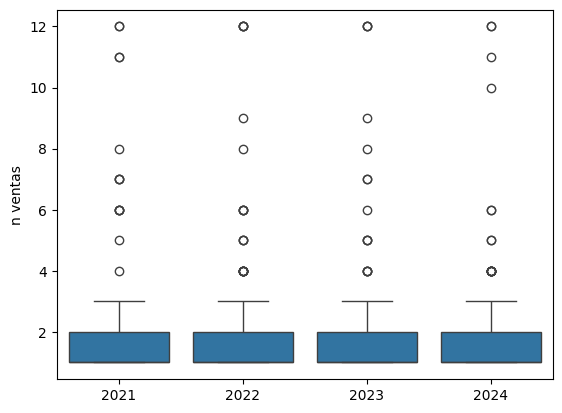

In [86]:
#boxplot de distribucion de cantidad de ventas por sku por año
sns.boxplot(data=df_ventas_año, x='año', y='total_venta')
plt.ylabel('n ventas')
plt.xlabel("")
plt.show()

<Axes: >

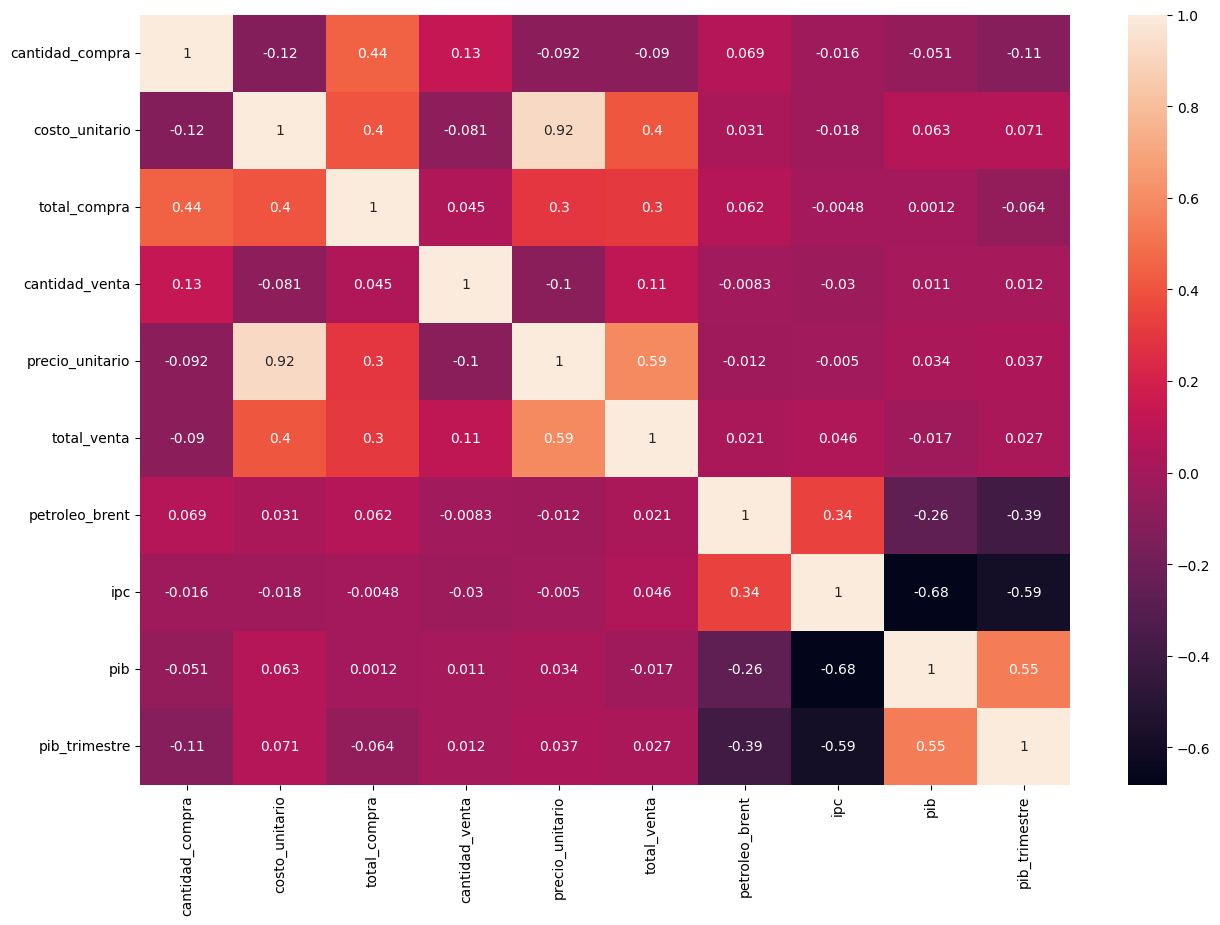

In [87]:
#mapa de calor de correlacion
plt.figure(figsize=(15, 10))
sns.heatmap(df_ml.drop(columns=['año', 'mes', 'producto_id']).corr(), annot=True)

- Decidir entre mantener costo unitario o precio unitario (MUY correlacionados)

In [88]:
#sku sin ventas
sku_sv = df_ml.groupby('producto_id')['total_venta'].sum().reset_index()
sku_sv = sku_sv.loc[sku_sv['total_venta']==0]
sku_sv

,producto_id,total_venta
3,BS11.0009,0.0
9,BS8.0016,0.0
10,BS8.0019,0.0
14,BS9.0025,0.0
17,BS9.0030,0.0
...,...,...
1088,ITM.0082,0.0
1089,ITM.0083,0.0
1093,ITM.0087,0.0
1098,ITME.00001,0.0


# **APLICACION DEL MODELO**

In [89]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   año              2248 non-null   int32  
 1   mes              2248 non-null   int32  
 2   producto_id      2248 non-null   object 
 3   cantidad_compra  2248 non-null   float64
 4   costo_unitario   1422 non-null   float64
 5   total_compra     2248 non-null   float64
 6   cantidad_venta   2248 non-null   float64
 7   precio_unitario  2248 non-null   float64
 8   total_venta      2248 non-null   float64
 9   petroleo_brent   2248 non-null   float64
 10  ipc              2248 non-null   float64
 11  pib              2248 non-null   float64
 12  pib_trimestre    2248 non-null   float64
dtypes: float64(10), int32(2), object(1)
memory usage: 210.9+ KB


**TALLER DE MACHINE LEARNING**

In [90]:
#llenar valores nulos de precio unitario con ultimo valor registrado por producto_id
df_ml['precio_unitario'] = df_ml.groupby('producto_id')['precio_unitario'].fillna(method='ffill')
df_ml.reset_index(drop=True, inplace=True)
df_ml

C:\Users\JI\AppData\Local\Temp\ipykernel_34312\3254823408.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_ml['precio_unitario'] = df_ml.groupby('producto_id')['precio_unitario'].fillna(method='ffill')
C:\Users\JI\AppData\Local\Temp\ipykernel_34312\3254823408.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ml['precio_unitario'] = df_ml.groupby('producto_id')['precio_unitario'].fillna(method='ffill')


,año,mes,producto_id,cantidad_compra,costo_unitario,total_compra,cantidad_venta,precio_unitario,total_venta,petroleo_brent,ipc,pib,pib_trimestre
0,2021,1,I.I.0126,0.0,NaN,0.00,456.0,1.8475,842.84,55.6,104.35,0.042,0.03766
1,2021,1,I.I.0172,9272.0,0.83,7783.19,1216.0,1.9615,2381.69,55.6,104.35,0.042,0.03766
2,2021,1,I.I.0594,0.0,NaN,0.00,1.0,304.0000,304.00,55.6,104.35,0.042,0.03766
3,2021,1,I.I.0595,1.0,208.40,208.40,1.0,561.0000,561.00,55.6,104.35,0.042,0.03766
4,2021,1,I.I.0596,1.0,1013.32,1013.32,1.0,2146.0000,2146.00,55.6,104.35,0.042,0.03766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,2024,12,I.I.E90061,6.0,24.01,144.06,6.0,33.4800,200.88,88.0,112.31,0.020,0.02000
2244,2024,12,I.I.P8. PK 01,0.0,NaN,0.00,256.0,6.4900,1661.44,88.0,112.31,0.020,0.02000
2245,2024,12,I.I.P8.0014,160.0,1.93,308.80,0.0,1.9300,0.00,88.0,112.31,0.020,0.02000
2246,2024,12,I.I.P9. PK-1,315.0,1.28,403.20,0.0,1.2800,0.00,88.0,112.31,0.020,0.02000


In [91]:
#generar df con value counts de producto_
df_cluster = pd.DataFrame(df_ml['producto_id'].value_counts()).reset_index()
df_cluster.describe()

,count
count,1106.000000
mean,2.032550
std,3.454007
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,48.000000


In [92]:
#clasificar productos en df_ml segun 2 registros o menos de producto_id
df_ml['cluster'] = np.where(df_ml['producto_id'].isin(df_cluster[df_cluster['count'] <= 2]['producto_id']), 1, 0)
df_ml

,año,mes,producto_id,cantidad_compra,costo_unitario,total_compra,cantidad_venta,precio_unitario,total_venta,petroleo_brent,ipc,pib,pib_trimestre,cluster
0,2021,1,I.I.0126,0.0,NaN,0.00,456.0,1.8475,842.84,55.6,104.35,0.042,0.03766,0
1,2021,1,I.I.0172,9272.0,0.83,7783.19,1216.0,1.9615,2381.69,55.6,104.35,0.042,0.03766,0
2,2021,1,I.I.0594,0.0,NaN,0.00,1.0,304.0000,304.00,55.6,104.35,0.042,0.03766,1
3,2021,1,I.I.0595,1.0,208.40,208.40,1.0,561.0000,561.00,55.6,104.35,0.042,0.03766,1
4,2021,1,I.I.0596,1.0,1013.32,1013.32,1.0,2146.0000,2146.00,55.6,104.35,0.042,0.03766,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,2024,12,I.I.E90061,6.0,24.01,144.06,6.0,33.4800,200.88,88.0,112.31,0.020,0.02000,1
2244,2024,12,I.I.P8. PK 01,0.0,NaN,0.00,256.0,6.4900,1661.44,88.0,112.31,0.020,0.02000,1
2245,2024,12,I.I.P8.0014,160.0,1.93,308.80,0.0,1.9300,0.00,88.0,112.31,0.020,0.02000,1
2246,2024,12,I.I.P9. PK-1,315.0,1.28,403.20,0.0,1.2800,0.00,88.0,112.31,0.020,0.02000,1


In [93]:
#definir funcion para categorizar variables
def is_binary(df_, nums):
    df = df_.copy()
    variables = []
    for var in nums:
        flag = True
        unique = df_[var].unique()
        for value in unique:
            if value not in [0, 1, np.nan, 0.0, 1.0]:
                flag = False
        if flag == True:
            variables.append(var)
    return variables


def breakdown_vars(df):
    """
    This function allow us categorize accodign to numerical or not
    """
    categorical = []
    nonormal = []
    normal = []
    binaries = is_binary(df, df.columns)
    for t in df.columns:
            if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category') and t not in binaries:
                categorical.append(t)
            if (df[t].dtypes=="int64" or df[t].dtypes=="float64") and t not in binaries:
              n,p = stats.shapiro(df[t])
              if p<0.05:
                nonormal.append(t)
              else:
                normal.append(t)
    return categorical, binaries, nonormal, normal

In [94]:
#definite variables categoricas, binarias y numericas
categorical, binaries, nonormal, normal = breakdown_vars(df_ml)
categorical, binaries, nonormal, normal

(['producto_id'],
 ['cluster'],
 ['cantidad_compra',
  'total_compra',
  'cantidad_venta',
  'precio_unitario',
  'total_venta',
  'petroleo_brent',
  'ipc',
  'pib',
  'pib_trimestre'],
 ['costo_unitario'])

In [95]:
#estandarizar variables no normales
scaler = StandardScaler()

for n in nonormal:
  if n != 'cantidad_venta':
    columna_a_escalar = [n]
    df_ml[n] = scaler.fit_transform(df_ml[columna_a_escalar])


**APLICAMOS ONEHOTENCODER**

In [96]:
#OHE a producto_id
enc = OneHotEncoder()
enc.fit(df_ml[['producto_id']])
enc_df = pd.DataFrame(enc.transform(df_ml[['producto_id']]).toarray(), columns=enc.get_feature_names_out(['producto_id']))
df_ml = pd.concat([df_ml, enc_df], axis=1)
df_ml.drop(columns=['producto_id'], inplace=True)

In [97]:
#botar columnas innecesarias
df_ml.drop(columns=['año', 'mes', 'costo_unitario', 'pib'], inplace=True)
df_ml

,cantidad_compra,total_compra,cantidad_venta,precio_unitario,total_venta,petroleo_brent,ipc,pib_trimestre,cluster,producto_id_BS11.0001,...,producto_id_ITM.0090,producto_id_ITM.0091,producto_id_ITME.00001,producto_id_TA.1343,producto_id_TA.2825,producto_id_TA.3446,producto_id_TA.3447,producto_id_TA.4371,producto_id_TA.4694,producto_id_YC.0416
0,-0.227302,-0.468185,456.0,-0.403850,-0.295121,-2.356409,-1.514141,1.817221,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.505878,2.455183,1216.0,-0.403805,0.175584,-2.356409,-1.514141,1.817221,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.227302,-0.468185,1.0,-0.285751,-0.459942,-2.356409,-1.514141,1.817221,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.226792,-0.389910,1.0,-0.185301,-0.381331,-2.356409,-1.514141,1.817221,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.226792,-0.087582,1.0,0.434206,0.103491,-2.356409,-1.514141,1.817221,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,-0.224240,-0.414076,6.0,-0.391486,-0.491484,0.238291,0.905447,0.687267,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2244,-0.227302,-0.468185,256.0,-0.402035,-0.044727,0.238291,0.905447,0.687267,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2245,-0.145625,-0.352200,0.0,-0.403817,-0.552930,0.238291,0.905447,0.687267,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2246,-0.066501,-0.316743,0.0,-0.404071,-0.552930,0.238291,0.905447,0.687267,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
#definir X e y
X = df_ml.drop(columns =['cantidad_venta'])
y = df_ml['cantidad_venta']

In [99]:
#deividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)

In [100]:
#definir modelo
mlp = MLPRegressor( random_state=42)

In [101]:
#validacion cruazada con validacion cruzada y optimizacion de hiperparametros con GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100, 100, 100, 100, 100, 100, 100, 100)],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'max_iter' : [1700, 2000],
    'alpha': [0.0001, 0.000001, 0.00000001], #evita overfitting via penalizacion de pesos de mayor magnitud
    'learning_rate': ['constant', 'adaptive']}

grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

#evaluacion del modelo con error medio absoluto
mean = mean_absolute_error(y_test, y_pred)
mean

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\JI\4ga-final-project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


12.174959321680706

In [102]:
best_mlp

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
             max_iter=1700, random_state=42, solver='lbfgs')

In [103]:
#guardar modelo
import joblib
joblib.dump(best_mlp, 'best_mlp.pkl')

['best_mlp.pkl']

# **APENDICE**

In [105]:
#dinero invertido en stock sin ventas
df_prod_sv['total_compra'].sum()

np.float64(133.70124198878514)

# **VALORES GENERALES**

VENTA TOTAL

In [ ]:
 df_ml['total_venta'].sum()

VENTAS AÑO A AÑO

In [ ]:
 df_años_venta = df_ml.groupby('año').agg({'total_venta': 'sum'}).reset_index()
 df_años_venta

In [ ]:
df_años_compra = df_ml.groupby('año').agg({'total_compra': 'sum'}).reset_index()
df_años_compra

DATOS DE VENTA E INDICADORES MACROECONOMICOS

In [ ]:
df_venta_indicadores = df_ml.groupby('año').agg({'pib': 'mean', 'ipc': 'mean', 'petroleo_brent': 'mean', 'total_venta': 'sum' }).reset_index()
df_venta_indicadores